# **Hotel SEM Campaign**

---


SEM campaigns consist of three main components:
1.   **Keywords:** User search intent, what they are seeking for
2.   **Ads:** Your promise to the user to satisfy their intention
3.   **Landing page:** linked within the ads

In order to be specific and relevant to users,I intend to promote products or services with a primary focus on delivering the right landing page to the users via the relevant message or expectation.

This project aim to generate **Keywords** and **Ads**, also will be targeting people who are looking for hotels and homestays in Thailand.

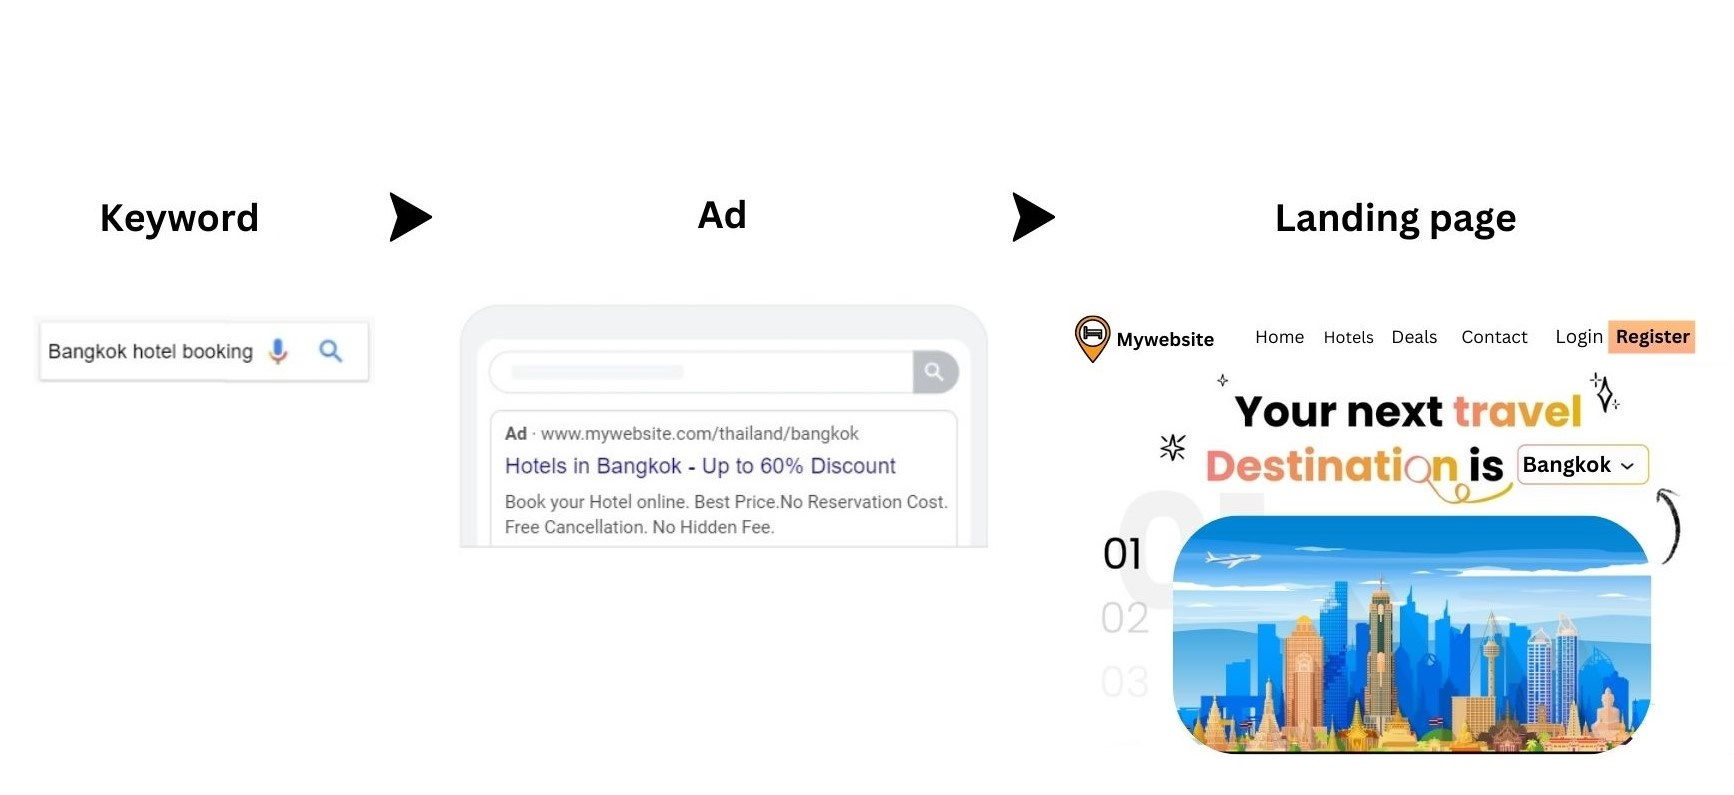

This is the mapping that I aim to achieve, as shown below. I want to have two data frames as output, one for ads and one for keywords. After completing these, I will be able to upload them as CSV files to Google AdWords.

**Keywords table**

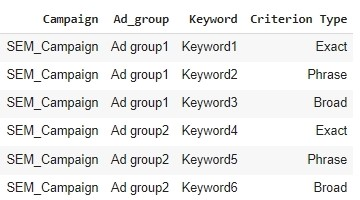

**Ads table**

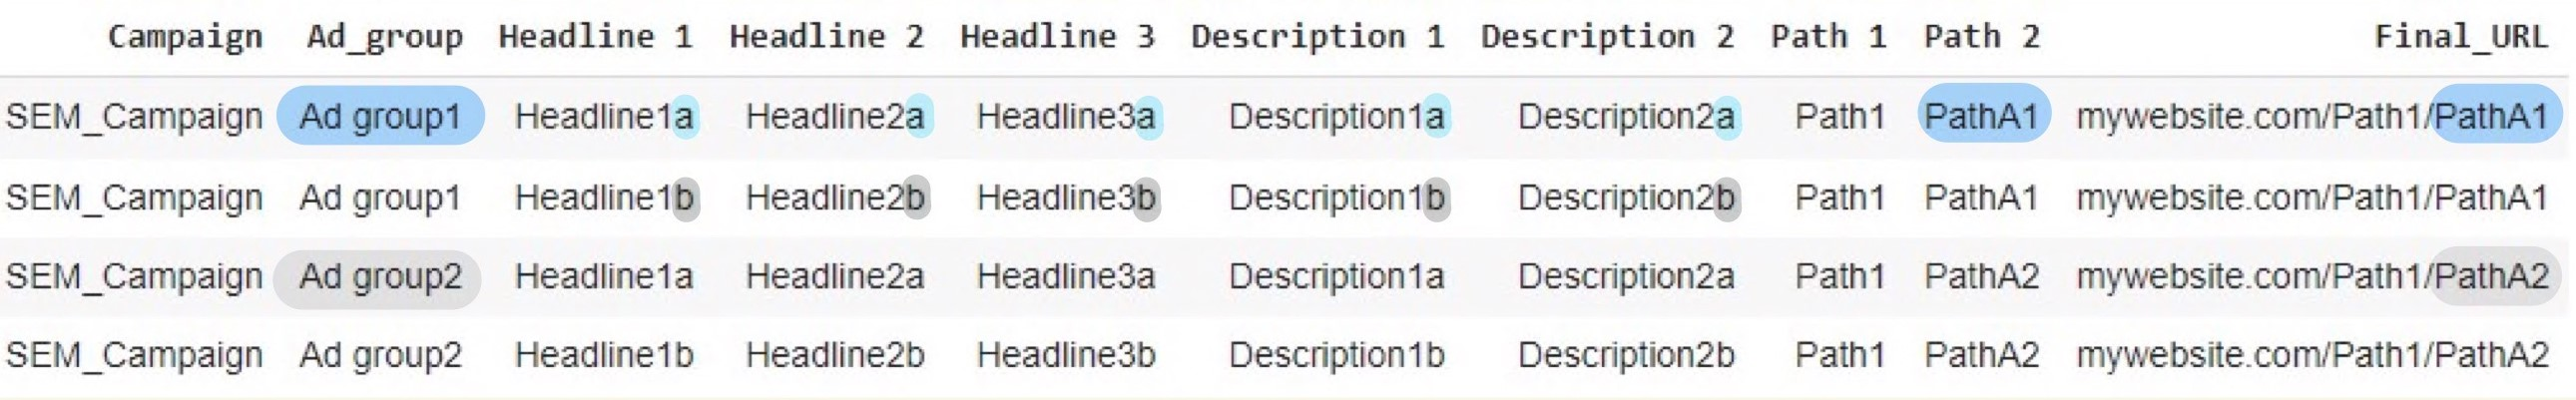

# **Generating Keywords for SEM Campaign**

Gerenate various keyword combinations and understand how to organize them into campaigns and ad groups.

First, gather the two lists of terms that will be utilizing:    
1.   **Product:** list of products and services that we are trying to sell.
2.   **Words:** list of all the keywords that indicate an intention to buy products or services.

This project will focus on generating keywords separated into two parts, which are **hotels** and **homestays**, to focus on each type of place to stay.

In [ ]:
pip install advertools


In [ ]:
pip install pandas

In [ ]:
import pandas as pd  
import advertools as adv

Upload CSV file to get top 10 places to visit in Thailand.           
Create cities in Thailand data frame contain: 'Destination', 'Website', 'Final_Website'

In [ ]:
df_cities_thailand = pd.read_csv('Popular_Destinations_Thailand.csv')
df_cities_thailand

,Destination,Website,Final_Website
0,Bangkok,www.mywebsite.com/thailand/bangkok,www.mywebsite.com/thailand/bangkok
1,Chiang Mai,www.mywebsite.com/thailand/chiang mai,www.mywebsite.com/thailand/chiang-mai
2,Phuket,www.mywebsite.com/thailand/phuket,www.mywebsite.com/thailand/phuket
3,Koh Samui,www.mywebsite.com/thailand/koh samui,www.mywebsite.com/thailand/koh-samui
4,Hua Hin,www.mywebsite.com/thailand/hua hin,www.mywebsite.com/thailand/hua-hin
5,Ayutthaya,www.mywebsite.com/thailand/ayutthaya,www.mywebsite.com/thailand/ayutthaya
6,Krabi,www.mywebsite.com/thailand/krabi,www.mywebsite.com/thailand/krabi
7,Chiang Rai,www.mywebsite.com/thailand/chiang rai,www.mywebsite.com/thailand/chiang-rai
8,Kanchanaburi,www.mywebsite.com/thailand/kanchanaburi,www.mywebsite.com/thailand/kanchanaburi
9,Phi Phi Island,www.mywebsite.com/thailand/phi phi island,www.mywebsite.com/thailand/phi-phi-island


Create list name **'Words'** selecting words that relevant to the products/services you are promoting by thinking or from keyword tools.

In [ ]:
words = ['booking','reservation','promo','deals','promotion','discount']

In order to create **keywords** by combining **products** with **words** together into a keywords data frame that contains the campaign name, ad group name, keyword, and match type by applying advertools.
The **kw_generate** function will used for this task. Here are the main arguments that the function takes:

1. **products:** products or services will be used as the names of the ad groups

2. **words:** related words that make it clear that the user is interested in products

3. **max_len:** the maximum number of words that you want. If you specify 3, for example, the function will combine Bangkok hotels with one word, as well as with two words so you end up with keywords consisting of two and three words. **'Bangkok hotels booking', ' Bangkok hotels price'**, as well as **'Bangkok hotels booking price', 'Bangkok hotels price booking'.** 

4. **match_types:** one or more of ('Exact', 'Phrase', 'Broad')

5. **order_matters:** whether or not the order of words in keywords matters, default False

6. **campaign_name:** name of campaign

**NOTE:** I consider **'Bangkok hotels'** as one word.

**Match types details**
There are three match types: exact, phrase, and broad Which are three types of criteria for targeting an audience in a search advertising campaign in Google AdWords.
1.   **Broad match** is searches that relate to your keywords which is one that reaches the widest audience.
2.   **Phase match** is searches that include wording of your keywords. It provides some of the variety of broad match, but with more control.
3.   **Exact match** is searches that are the same meaning as keywords. It is the most specific and restrictive of the keyword match types.



# **Generate Hotels Keywords**

In [ ]:
df_kw_hotel = adv.kw_generate(df_cities_thailand['Destination'].values + ' hotels',  
                              words, 
                              max_len = 3,
                              order_matters = True,
                              campaign_name = 'SEM_Campaign')
df_kw_hotel

,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Campaign,Bangkok Hotels,Bangkok hotels booking,Exact,Booking
1,SEM_Campaign,Bangkok Hotels,Bangkok hotels booking,Phrase,Booking
2,SEM_Campaign,Bangkok Hotels,+Bangkok +hotels +booking,Broad,Booking
3,SEM_Campaign,Bangkok Hotels,Bangkok hotels reservation,Exact,Reservation
4,SEM_Campaign,Bangkok Hotels,Bangkok hotels reservation,Phrase,Reservation
...,...,...,...,...,...
3055,SEM_Campaign,Phi Phi Island Hotels,discount deals Phi Phi Island hotels,Phrase,Discount;Deals
3056,SEM_Campaign,Phi Phi Island Hotels,+discount +deals +Phi +Phi +Island +hotels,Broad,Discount;Deals
3057,SEM_Campaign,Phi Phi Island Hotels,discount promotion Phi Phi Island hotels,Exact,Discount;Promotion
3058,SEM_Campaign,Phi Phi Island Hotels,discount promotion Phi Phi Island hotels,Phrase,Discount;Promotion


The Hotel keywords data frame shows keyword column with the combination of cities and words with maximum word length are two and three words by determine **max_len=3** for example: **'Bangkok hotels booking'**,**'Bangkok hotels booking discount'**,and etc.
The generated keywords will be switched position alternative ways from setting **order_matters=True** for example:  **'Bangkok hotels booking'**, **' booking Bangkok hotels'**,and etc.


**NOTE:** Each city will get its own ad group.

I consider **'Bangkok hotels'** as one word.






Since I want to promote both hotels and homestays in each city, I remove **'Hotels'** from **'Ad Group	'**.

In [ ]:
df_kw_hotel['Ad Group'] = df_kw_hotel['Ad Group'].str.replace('Hotels','').str.strip()
df_kw_hotel

,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Campaign,Bangkok,Bangkok hotels booking,Exact,Booking
1,SEM_Campaign,Bangkok,Bangkok hotels booking,Phrase,Booking
2,SEM_Campaign,Bangkok,+Bangkok +hotels +booking,Broad,Booking
3,SEM_Campaign,Bangkok,Bangkok hotels reservation,Exact,Reservation
4,SEM_Campaign,Bangkok,Bangkok hotels reservation,Phrase,Reservation
...,...,...,...,...,...
3055,SEM_Campaign,Phi Phi Island,discount deals Phi Phi Island hotels,Phrase,Discount;Deals
3056,SEM_Campaign,Phi Phi Island,+discount +deals +Phi +Phi +Island +hotels,Broad,Discount;Deals
3057,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island hotels,Exact,Discount;Promotion
3058,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island hotels,Phrase,Discount;Promotion


# **Generate Homestays Keywords**

Repeat the previous step, using **'homestays'** instead **'hotels'**

In [ ]:
df_kw_homestay = adv.kw_generate(df_cities_thailand['Destination'].values + ' homestays',  
                              words, 
                              max_len = 3,
                              order_matters = True,
                              campaign_name = 'SEM_Campaign')
df_kw_homestay

,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Campaign,Bangkok Homestays,Bangkok homestays booking,Exact,Booking
1,SEM_Campaign,Bangkok Homestays,Bangkok homestays booking,Phrase,Booking
2,SEM_Campaign,Bangkok Homestays,+Bangkok +homestays +booking,Broad,Booking
3,SEM_Campaign,Bangkok Homestays,Bangkok homestays reservation,Exact,Reservation
4,SEM_Campaign,Bangkok Homestays,Bangkok homestays reservation,Phrase,Reservation
...,...,...,...,...,...
3055,SEM_Campaign,Phi Phi Island Homestays,discount deals Phi Phi Island homestays,Phrase,Discount;Deals
3056,SEM_Campaign,Phi Phi Island Homestays,+discount +deals +Phi +Phi +Island +homestays,Broad,Discount;Deals
3057,SEM_Campaign,Phi Phi Island Homestays,discount promotion Phi Phi Island homestays,Exact,Discount;Promotion
3058,SEM_Campaign,Phi Phi Island Homestays,discount promotion Phi Phi Island homestays,Phrase,Discount;Promotion


In [ ]:
df_kw_homestay['Ad Group'] = df_kw_homestay['Ad Group'].str.replace('Homestays','').str.strip()
df_kw_hotel

,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Campaign,Bangkok,Bangkok hotels booking,Exact,Booking
1,SEM_Campaign,Bangkok,Bangkok hotels booking,Phrase,Booking
2,SEM_Campaign,Bangkok,+Bangkok +hotels +booking,Broad,Booking
3,SEM_Campaign,Bangkok,Bangkok hotels reservation,Exact,Reservation
4,SEM_Campaign,Bangkok,Bangkok hotels reservation,Phrase,Reservation
...,...,...,...,...,...
3055,SEM_Campaign,Phi Phi Island,discount deals Phi Phi Island hotels,Phrase,Discount;Deals
3056,SEM_Campaign,Phi Phi Island,+discount +deals +Phi +Phi +Island +hotels,Broad,Discount;Deals
3057,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island hotels,Exact,Discount;Promotion
3058,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island hotels,Phrase,Discount;Promotion


Combine Hotel keywords and Homestay keywords data frame into one data frame which is **Keywords data frame**. I will be able to map both hotels and homestays to the same **Ad Group**

In [ ]:
df_kw_generate = pd.concat([df_kw_hotel,df_kw_homestay],ignore_index = True)
df_kw_generate

,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Campaign,Bangkok,Bangkok hotels booking,Exact,Booking
1,SEM_Campaign,Bangkok,Bangkok hotels booking,Phrase,Booking
2,SEM_Campaign,Bangkok,+Bangkok +hotels +booking,Broad,Booking
3,SEM_Campaign,Bangkok,Bangkok hotels reservation,Exact,Reservation
4,SEM_Campaign,Bangkok,Bangkok hotels reservation,Phrase,Reservation
...,...,...,...,...,...
6115,SEM_Campaign,Phi Phi Island,discount deals Phi Phi Island homestays,Phrase,Discount;Deals
6116,SEM_Campaign,Phi Phi Island,+discount +deals +Phi +Phi +Island +homestays,Broad,Discount;Deals
6117,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island homestays,Exact,Discount;Promotion
6118,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island homestays,Phrase,Discount;Promotion


In [ ]:
# View the summary to check ad groups with the same number of keyword
df_kw_generate.groupby(['Ad Group', 'Criterion Type']).agg({'Keyword': 'count'})

Keyword
Ad Group       Criterion Type         
Ayutthaya      Broad               204
               Exact               204
               Phrase              204
Bangkok        Broad               204
               Exact               204
               Phrase              204
Chiang Mai     Broad               204
               Exact               204
               Phrase              204
Chiang Rai     Broad               204
               Exact               204
               Phrase              204
Hua Hin        Broad               204
               Exact               204
               Phrase              204
Kanchanaburi   Broad               204
               Exact               204
               Phrase              204
Koh Samui      Broad               204
               Exact               204
               Phrase              204
Krabi          Broad               204
               Exact               204
               Phrase              204
Phi Phi Island Broad               204
               Exact               204
               Phrase              204
Phuket         Broad               204
               Exact               204
               Phrase              204

When choosing **max_len=3**, it obtains more precise phrases that suggest a greater intent to find, such as 'booking discount Bangkok Hotels' or 'Bangkok Hotels booking promotion'. However, some of those additional keywords aren't actually more relevant for example **'Bangkok hotels promotion promo'**. This is unnecessary to include in keywords, and they are simple to remove since it is already labeled.  It can also filter rows with the label: **'Promo;Promotion', 'Promotion;Promo'**. It may look at one ad group as an example and find the circumstances where this doesn't make sense, then apply this to the entire data frame.

In [ ]:
# View distinct lables 
df_kw_generate['Labels'].unique()

array(['Booking', 'Reservation', 'Promo', 'Deals', 'Promotion',
       'Discount', 'Booking;Reservation', 'Booking;Promo',
       'Booking;Deals', 'Booking;Promotion', 'Booking;Discount',
       'Reservation;Booking', 'Reservation;Promo', 'Reservation;Deals',
       'Reservation;Promotion', 'Reservation;Discount', 'Promo;Booking',
       'Promo;Reservation', 'Promo;Deals', 'Promo;Promotion',
       'Promo;Discount', 'Deals;Booking', 'Deals;Reservation',
       'Deals;Promo', 'Deals;Promotion', 'Deals;Discount',
       'Promotion;Booking', 'Promotion;Reservation', 'Promotion;Promo',
       'Promotion;Deals', 'Promotion;Discount', 'Discount;Booking',
       'Discount;Reservation', 'Discount;Promo', 'Discount;Deals',
       'Discount;Promotion'], dtype=object)

In [ ]:
# Check to see how many keywords will be removed. 
label1 = (df_kw_generate['Labels'] == 'Promotion;Promo').sum()
label2 = (df_kw_generate['Labels'] == 'Promo;Promotion').sum()
print('The number of label that have one keyword is {}'.format(label1))
print('The number of label that have two keywords is {}'.format(label2))

The number of label that have one keyword is 180
The number of label that have two keywords is 180


Final keywords data frame has 5760 rows remain from 6120 rows.

In [ ]:
df_kw_generate = df_kw_generate[~df_kw_generate['Labels'].isin(['Promo;Promotion','Promotion;Promo'])]
df_kw_generate

,Campaign,Ad Group,Keyword,Criterion Type,Labels
0,SEM_Campaign,Bangkok,Bangkok hotels booking,Exact,Booking
1,SEM_Campaign,Bangkok,Bangkok hotels booking,Phrase,Booking
2,SEM_Campaign,Bangkok,+Bangkok +hotels +booking,Broad,Booking
3,SEM_Campaign,Bangkok,Bangkok hotels reservation,Exact,Reservation
4,SEM_Campaign,Bangkok,Bangkok hotels reservation,Phrase,Reservation
...,...,...,...,...,...
6115,SEM_Campaign,Phi Phi Island,discount deals Phi Phi Island homestays,Phrase,Discount;Deals
6116,SEM_Campaign,Phi Phi Island,+discount +deals +Phi +Phi +Island +homestays,Broad,Discount;Deals
6117,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island homestays,Exact,Discount;Promotion
6118,SEM_Campaign,Phi Phi Island,discount promotion Phi Phi Island homestays,Phrase,Discount;Promotion


In [ ]:
# View the final summary
df_kw_generate.groupby(['Ad Group', 'Criterion Type']).agg({'Keyword' : 'count'})

Keyword
Ad Group       Criterion Type         
Ayutthaya      Broad               192
               Exact               192
               Phrase              192
Bangkok        Broad               192
               Exact               192
               Phrase              192
Chiang Mai     Broad               192
               Exact               192
               Phrase              192
Chiang Rai     Broad               192
               Exact               192
               Phrase              192
Hua Hin        Broad               192
               Exact               192
               Phrase              192
Kanchanaburi   Broad               192
               Exact               192
               Phrase              192
Koh Samui      Broad               192
               Exact               192
               Phrase              192
Krabi          Broad               192
               Exact               192
               Phrase              192
Phi Phi Island Broad               192
               Exact               192
               Phrase              192
Phuket         Broad               192
               Exact               192
               Phrase              192

# **Additional Note**
**Synonyms and spelling variations:** There are some cases where users search using synonyms to mention what they need. For example, in a campaign, all of the following product names may be used to suggest the same destination: **Bangkok, BKK, Chiang Mai, CMI, and Koh Phi Phi, Phi Phi Island** which might all be used for the same purpose.There is no exact solution to this one.You will need to think creatively.

Save result as a CSV file. Then it will be able to import it to Google AdWords.

In [ ]:
df_kw_generate.to_csv('keywords.csv',index = False)

# **Creating Google Ads**
The last step is to create Google AdWords campaign by constructing ads together. This is a straightforward method of making advertisements. Creating each slot and combining them into a single data frame.
The **ad_create** method automates this by enabling to provide it the following parameters:

1. **template:** a string format template, using braces e.g. 'Booking {} today.'

2. **replacements:** replacement strings to be inserted in template

3. **fallback:** the string to insert in template in case replacement is longer than max_len

4. **max_len:** the maximum allowed length of the full string

5. **capitalize:** whether or not to capitalize words in the result

Generate all ads for all ad groups; this consists of the following fields for each ad:

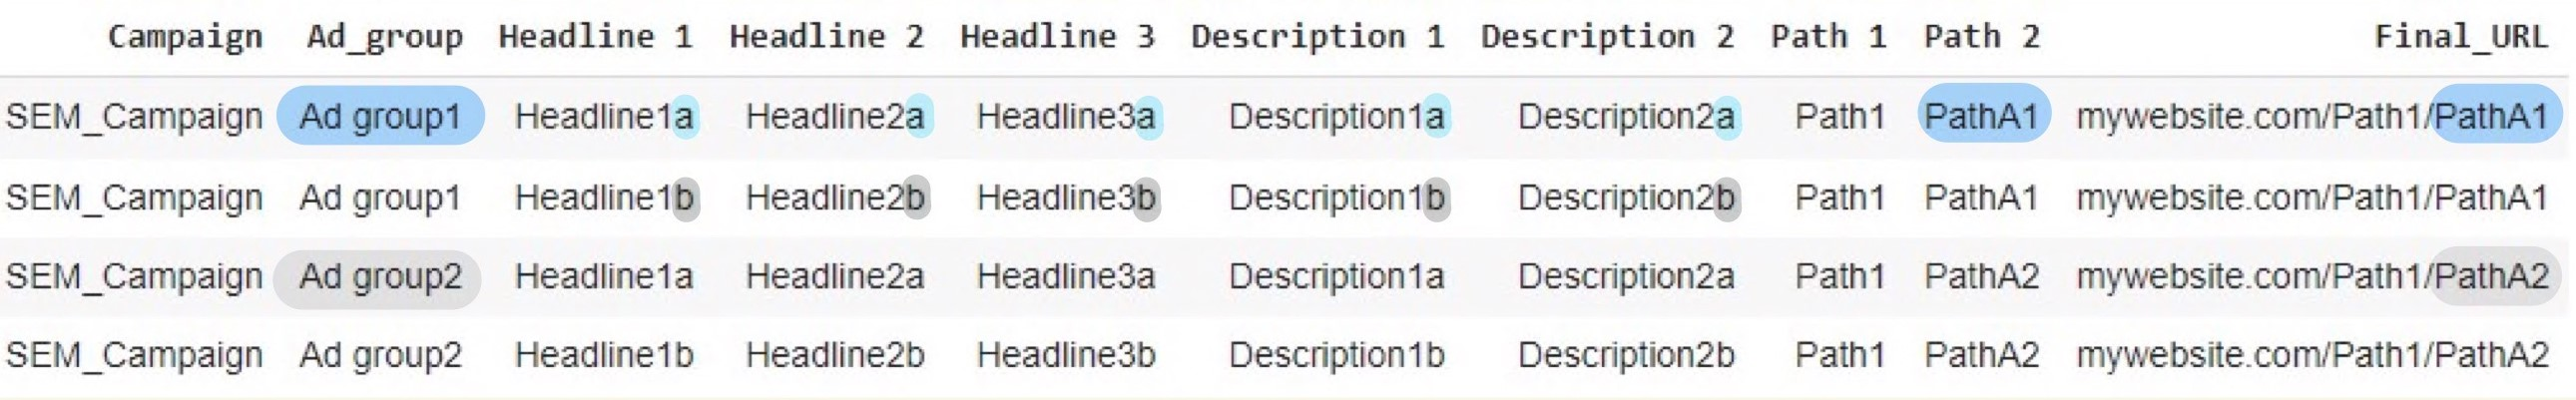

The limitation of each field in Google AdWords




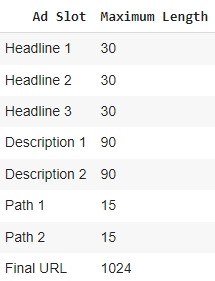

Field from ad table will show in landing page 

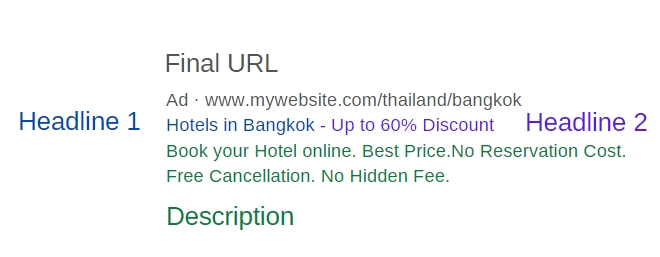

Creating data frame for each ad groups

In [ ]:
df_ad = pd.DataFrame(
        {   'Campaign'  : 'SEM_Campaign',
            'Ad Group'  : df_cities_thailand['Destination'],
            'Path 1'    : 'thailand',
            'Path 2'    : df_cities_thailand['Destination'].str.replace(' ','-').str.lower(),
            'Final_URL' : df_cities_thailand['Final_Website']
  }
)
df_ad

,Campaign,Ad Group,Path 1,Path 2,Final_URL
0,SEM_Campaign,Bangkok,thailand,bangkok,www.mywebsite.com/thailand/bangkok
1,SEM_Campaign,Chiang Mai,thailand,chiang-mai,www.mywebsite.com/thailand/chiang-mai
2,SEM_Campaign,Phuket,thailand,phuket,www.mywebsite.com/thailand/phuket
3,SEM_Campaign,Koh Samui,thailand,koh-samui,www.mywebsite.com/thailand/koh-samui
4,SEM_Campaign,Hua Hin,thailand,hua-hin,www.mywebsite.com/thailand/hua-hin
5,SEM_Campaign,Ayutthaya,thailand,ayutthaya,www.mywebsite.com/thailand/ayutthaya
6,SEM_Campaign,Krabi,thailand,krabi,www.mywebsite.com/thailand/krabi
7,SEM_Campaign,Chiang Rai,thailand,chiang-rai,www.mywebsite.com/thailand/chiang-rai
8,SEM_Campaign,Kanchanaburi,thailand,kanchanaburi,www.mywebsite.com/thailand/kanchanaburi
9,SEM_Campaign,Phi Phi Island,thailand,phi-phi-island,www.mywebsite.com/thailand/phi-phi-island


Since data frame that contains mapped Campaign, Ad Group, and Final URL  that added the Headline 1, Headline 2, and Description Fields. It can be used once. In case that want to add different descriptions to the Ads, it needs to be duplicated each row.

In [ ]:
df_ad = df_ad.loc[df_ad.index.repeat(2)].reset_index(drop=True)
df_ad

,Campaign,Ad Group,Path 1,Path 2,Final_URL
0,SEM_Campaign,Bangkok,thailand,bangkok,www.mywebsite.com/thailand/bangkok
1,SEM_Campaign,Bangkok,thailand,bangkok,www.mywebsite.com/thailand/bangkok
2,SEM_Campaign,Chiang Mai,thailand,chiang-mai,www.mywebsite.com/thailand/chiang-mai
3,SEM_Campaign,Chiang Mai,thailand,chiang-mai,www.mywebsite.com/thailand/chiang-mai
4,SEM_Campaign,Phuket,thailand,phuket,www.mywebsite.com/thailand/phuket
5,SEM_Campaign,Phuket,thailand,phuket,www.mywebsite.com/thailand/phuket
6,SEM_Campaign,Koh Samui,thailand,koh-samui,www.mywebsite.com/thailand/koh-samui
7,SEM_Campaign,Koh Samui,thailand,koh-samui,www.mywebsite.com/thailand/koh-samui
8,SEM_Campaign,Hua Hin,thailand,hua-hin,www.mywebsite.com/thailand/hua-hin
9,SEM_Campaign,Hua Hin,thailand,hua-hin,www.mywebsite.com/thailand/hua-hin


In this step is to create all the headline 1, headline 2, final URL, and description.


1.   **Headline 1/ Headline 2:**  The keywords or the topic of products/services
2.   **Final URL:** The link of the websites
3.   **Descritption:** The product/service descriptions that want to be promoted








In [ ]:
Headline_1  = ['Hotels in {}','Homestays in {}']
HeadLine_2  = ['Up to 60% Discount','Book Now & Pay Later']
Description = ['Book your Hotel online.Best Price.No Reservation Cost.Free Cancellation. No Hidden Fee.',
               'Find homestays in Bangkok, Check out the star rating and review score before you book!']



Creating a function to insert cities into the headline 1 list.

In [ ]:
def cre_head_1(h,d):
  h1 = []
  for destination in range(len(d)):
    for head1 in h:
      headline1 = adv.ad_create(template = head1, 
                replacements = [d[destination]],
                fallback ='Thailand',    
                max_len = 30)
      h1 = h1 + headline1
  return pd.DataFrame(h1, columns = ['Headline 1'])

In [ ]:
df_head1 = cre_head_1(Headline_1,df_cities_thailand['Destination'])
df_head1

,Headline 1
0,Hotels In Bangkok
1,Homestays In Bangkok
2,Hotels In Chiang Mai
3,Homestays In Chiang Mai
4,Hotels In Phuket
5,Homestays In Phuket
6,Hotels In Koh Samui
7,Homestays In Koh Samui
8,Hotels In Hua Hin
9,Homestays In Hua Hin


Creating data frame contain: **'Headline 2', 'Headline 3', 'Description 1', 'Description 2'**

In [ ]:
df_ad_head = pd.DataFrame(
    {   'Headline 2'   : HeadLine_2,
        'Headline 3'   : '',
        'Description 1': Description,
        'Description 2': '',
 }
)
df_ad_head

,Headline 2,Headline 3,Description 1,Description 2
0,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
1,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",


Duplicate each row because I need to add each row to each ad group

In [ ]:
df_ad_head  = pd.concat([df_ad_head ]*10, ignore_index = True)
df_ad_head 

,Headline 2,Headline 3,Description 1,Description 2
0,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
1,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
2,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
3,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
4,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
5,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
6,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
7,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
8,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
9,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",


In the last step is to combine all the headline 1, headline 2, final URL, and description in to one data frame which is **Ads data frame**

In [ ]:
df_ads = pd.concat([df_ad, df_head1, df_ad_head], axis = 1)
df_ads

,Campaign,Ad Group,Path 1,Path 2,Final_URL,Headline 1,Headline 2,Headline 3,Description 1,Description 2
0,SEM_Campaign,Bangkok,thailand,bangkok,www.mywebsite.com/thailand/bangkok,Hotels In Bangkok,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
1,SEM_Campaign,Bangkok,thailand,bangkok,www.mywebsite.com/thailand/bangkok,Homestays In Bangkok,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
2,SEM_Campaign,Chiang Mai,thailand,chiang-mai,www.mywebsite.com/thailand/chiang-mai,Hotels In Chiang Mai,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
3,SEM_Campaign,Chiang Mai,thailand,chiang-mai,www.mywebsite.com/thailand/chiang-mai,Homestays In Chiang Mai,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
4,SEM_Campaign,Phuket,thailand,phuket,www.mywebsite.com/thailand/phuket,Hotels In Phuket,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
5,SEM_Campaign,Phuket,thailand,phuket,www.mywebsite.com/thailand/phuket,Homestays In Phuket,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
6,SEM_Campaign,Koh Samui,thailand,koh-samui,www.mywebsite.com/thailand/koh-samui,Hotels In Koh Samui,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
7,SEM_Campaign,Koh Samui,thailand,koh-samui,www.mywebsite.com/thailand/koh-samui,Homestays In Koh Samui,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",
8,SEM_Campaign,Hua Hin,thailand,hua-hin,www.mywebsite.com/thailand/hua-hin,Hotels In Hua Hin,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,
9,SEM_Campaign,Hua Hin,thailand,hua-hin,www.mywebsite.com/thailand/hua-hin,Homestays In Hua Hin,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",


This is final **Ads data frame** after rearrange the order of columns.

In [ ]:
df_ads = df_ads[[col for col  in df_ads if col not in ['Path 1','Path 2','Final_URL']] + ['Path 1','Path 2','Final_URL']]
df_ads

,Campaign,Ad Group,Headline 1,Headline 2,Headline 3,Description 1,Description 2,Path 1,Path 2,Final_URL
0,SEM_Campaign,Bangkok,Hotels In Bangkok,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,,thailand,bangkok,www.mywebsite.com/thailand/bangkok
1,SEM_Campaign,Bangkok,Homestays In Bangkok,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",,thailand,bangkok,www.mywebsite.com/thailand/bangkok
2,SEM_Campaign,Chiang Mai,Hotels In Chiang Mai,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,,thailand,chiang-mai,www.mywebsite.com/thailand/chiang-mai
3,SEM_Campaign,Chiang Mai,Homestays In Chiang Mai,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",,thailand,chiang-mai,www.mywebsite.com/thailand/chiang-mai
4,SEM_Campaign,Phuket,Hotels In Phuket,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,,thailand,phuket,www.mywebsite.com/thailand/phuket
5,SEM_Campaign,Phuket,Homestays In Phuket,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",,thailand,phuket,www.mywebsite.com/thailand/phuket
6,SEM_Campaign,Koh Samui,Hotels In Koh Samui,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,,thailand,koh-samui,www.mywebsite.com/thailand/koh-samui
7,SEM_Campaign,Koh Samui,Homestays In Koh Samui,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",,thailand,koh-samui,www.mywebsite.com/thailand/koh-samui
8,SEM_Campaign,Hua Hin,Hotels In Hua Hin,Up to 60% Discount,,Book your Hotel online.Best Price.No Reservati...,,thailand,hua-hin,www.mywebsite.com/thailand/hua-hin
9,SEM_Campaign,Hua Hin,Homestays In Hua Hin,Book Now & Pay Later,,"Find homestays in Bangkok, Check out the star ...",,thailand,hua-hin,www.mywebsite.com/thailand/hua-hin


After generating many keywords and variety of ads, I need to make sure that the mapping is correct. Therefore, I must have to double check in order to optimize the effective of the Advertising. First, it removes the duplicates, giving us a list of all unique elements. And all campaign and ad group names in both **Kerwords** and **Ads data frame** are the same.

In [ ]:
keyword_check = (df_kw_generate[['Campaign', 'Ad Group']]
             .drop_duplicates()
             .sort_values(['Campaign', 'Ad Group'])
             .reset_index(drop=True))
ad_check= (df_ads[['Campaign', 'Ad Group']]
                  .drop_duplicates()
                  .sort_values(['Campaign', 'Ad Group'])
                  .reset_index(drop=True))

In [ ]:
keyword_check == ad_check

,Campaign,Ad Group
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,True


Save result as a CSV file. Then it will be able to import it to Google AdWords.

In [ ]:
df_ads.to_csv('ads.csv',index = False)

**To summarize**, the CSV can be uploaded and start running for the campaigns. Also, this Google AdWords Campaign project can be applied to other products or services. For example by giving a 10 top list places in the world campaign as below. 

Providing additional dataset for a list of top 10 cities to visit in the world by scraping wikipedia table with pandas dataframe 

In [ ]:
pip install beautifulsoup4

In [ ]:
web_url = 'https://en.wikipedia.org/wiki/List_of_cities_by_international_visitors'
cities = pd.read_html(web_url,flavor = 'bs4')

According to wikipedia table contain 100 of cities, minimize the data frame to be into top 10 cities in the world. 

In [ ]:
df_top10_cities = cities[0][['City','Country /Territory']].iloc[:10]
df_top10_cities

,City,Country /Territory
0,Hong Kong,Hong Kong
1,Bangkok,Thailand
2,London,United Kingdom
3,Macau,Macau
4,Singapore,Singapore
5,Paris,France
6,Dubai,United Arab Emirates
7,New York City,United States
8,Kuala Lumpur,Malaysia
9,Istanbul,Turkey


Creating URL

In [ ]:
df_top10_cities['Website'] = 'www.mywebsite.com/'+df_top10_cities['Country /Territory']+'/'+df_top10_cities['City']
df_top10_cities['Website']
 # Create directory by starting with URL of the website ,add each country name and city respectively

0            www.mywebsite.com/Hong Kong/Hong Kong
1               www.mywebsite.com/Thailand/Bangkok
2          www.mywebsite.com/United Kingdom/London
3                    www.mywebsite.com/Macau/Macau
4            www.mywebsite.com/Singapore/Singapore
5                   www.mywebsite.com/France/Paris
6     www.mywebsite.com/United Arab Emirates/Dubai
7    www.mywebsite.com/United States/New York City
8          www.mywebsite.com/Malaysia/Kuala Lumpur
9                www.mywebsite.com/Turkey/Istanbul
Name: Website, dtype: object

In [ ]:
df_top10_cities['Final_Website'] = df_top10_cities['Website'].str.replace(' ','-').str.lower()
df_top10_cities['Final_Website']
# Clean website from above since there are some error from spacing by replace space with '-' instead and change all string in URL to lowercase 

0            www.mywebsite.com/hong-kong/hong-kong
1               www.mywebsite.com/thailand/bangkok
2          www.mywebsite.com/united-kingdom/london
3                    www.mywebsite.com/macau/macau
4            www.mywebsite.com/singapore/singapore
5                   www.mywebsite.com/france/paris
6     www.mywebsite.com/united-arab-emirates/dubai
7    www.mywebsite.com/united-states/new-york-city
8          www.mywebsite.com/malaysia/kuala-lumpur
9                www.mywebsite.com/turkey/istanbul
Name: Final_Website, dtype: object

This is final data frame of top 10 cities in the world that can be applied as the previous example.

In [ ]:
df_top10_cities

,City,Country /Territory,Website,Final_Website
0,Hong Kong,Hong Kong,www.mywebsite.com/Hong Kong/Hong Kong,www.mywebsite.com/hong-kong/hong-kong
1,Bangkok,Thailand,www.mywebsite.com/Thailand/Bangkok,www.mywebsite.com/thailand/bangkok
2,London,United Kingdom,www.mywebsite.com/United Kingdom/London,www.mywebsite.com/united-kingdom/london
3,Macau,Macau,www.mywebsite.com/Macau/Macau,www.mywebsite.com/macau/macau
4,Singapore,Singapore,www.mywebsite.com/Singapore/Singapore,www.mywebsite.com/singapore/singapore
5,Paris,France,www.mywebsite.com/France/Paris,www.mywebsite.com/france/paris
6,Dubai,United Arab Emirates,www.mywebsite.com/United Arab Emirates/Dubai,www.mywebsite.com/united-arab-emirates/dubai
7,New York City,United States,www.mywebsite.com/United States/New York City,www.mywebsite.com/united-states/new-york-city
8,Kuala Lumpur,Malaysia,www.mywebsite.com/Malaysia/Kuala Lumpur,www.mywebsite.com/malaysia/kuala-lumpur
9,Istanbul,Turkey,www.mywebsite.com/Turkey/Istanbul,www.mywebsite.com/turkey/istanbul
